In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from SVM import BinarizedSVM

In [7]:
df = pd.read_csv("datasets/ionosphere.data", header=None)

In [8]:
df

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,g
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,g
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,g
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,g


In [12]:
X = df.values[:,:-1]
y = df[34].apply(lambda x: 1 if x=='g' else -1).values

In [13]:
X = MinMaxScaler().fit_transform(X)

In [14]:
X.shape

(351, 34)

In [15]:
sum(y==-1)

126

In [16]:
df.columns[2:-1].values

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33],
      dtype=int64)

In [32]:
svm = BinarizedSVM(C=0.100, verbose=True)
svm.fit(X, y, predictor_variables_names=df.columns[:-1].values)
y_pred = svm.predict(X)
accuracy_score(y_pred, y)

Nomi delle variabili: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33]
initializing F...
iteration 0----------------------------------------------------------------------------------------------------
scelgo le soglie per 0...
soglie trovate: b_plus:1.0	 b_minus:1.0
	aggiungo soglia+ per 0...
scelgo le soglie per 1...
soglie trovate: b_plus:0.0	 b_minus:0.0
scelgo le soglie per 2...
soglie trovate: b_plus:0.59733	 b_minus:1.0
	aggiungo soglia+ per 2...
scelgo le soglie per 3...
soglie trovate: b_plus:0.292715	 b_minus:0.90793
	aggiungo soglia+ per 3...
	aggiungo soglia- per 3...
scelgo le soglie per 4...
soglie trovate: b_plus:0.61654	 b_minus:1.0
	aggiungo soglia+ per 4...
scelgo le soglie per 5...
soglie trovate: b_plus:0.396	 b_minus:0.902605
	aggiungo soglia+ per 5...
	aggiungo soglia- per 5...
scelgo le soglie per 6...
soglie trovate: b_plus:0.518795	 b_minus:1.0
	aggiungo soglia+ per 6...
scelgo le soglie per 7...
soglie tro

0.6410256410256411

In [25]:
accuracy_score(y_pred, y)

0.6410256410256411

[(1.0, 2.1645864935870248e-14), (1.0, 2.1645864935870248e-14)]
[(0.0, 2.1645864935870248e-14)]
[(1.0, 2.1645864935870248e-14), (0.935555, 8.010628404029006), (0.607145, 0.2909352336856525), (0.58594, 1.9999999999896583), (0.541665, 1.999999999979089)]
[(0.9166650000000001, -0.40495334805788413), (0.90793, -1.7276778257356349), (0.508155, 2.2653374872354037), (0.45588, -0.03836880822012527), (0.439525, 1.9999999999791), (0.292715, 1.2701618571323923)]
[(1.0, 2.1645864935870248e-14), (0.9046000000000001, -2.6612965072987924), (0.71164, 1.9999999999646996), (0.57618, 1.9351240864398924)]
[(0.902605, 0.37306251417262765), (0.5114, 1.0858205762778022), (0.504215, 1.1296309563445825), (0.396, 2.0000000000043503)]
[(1.0, 2.1645864935870248e-14), (0.990095, -0.6935381891507755), (0.864365, -0.35253843410063074), (0.64177, 1.9999999999967202), (0.509805, -1.4328468585602205)]
[(0.994515, -1.5919878555023617), (0.507355, -0.0042012425762680584), (0.304125, 1.9999999999608236), (0.299355000000000

C:\dev\BinarizedSVM\SVM.py:103: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  axs[i, j].set_ylim(omega_min, omega_max)


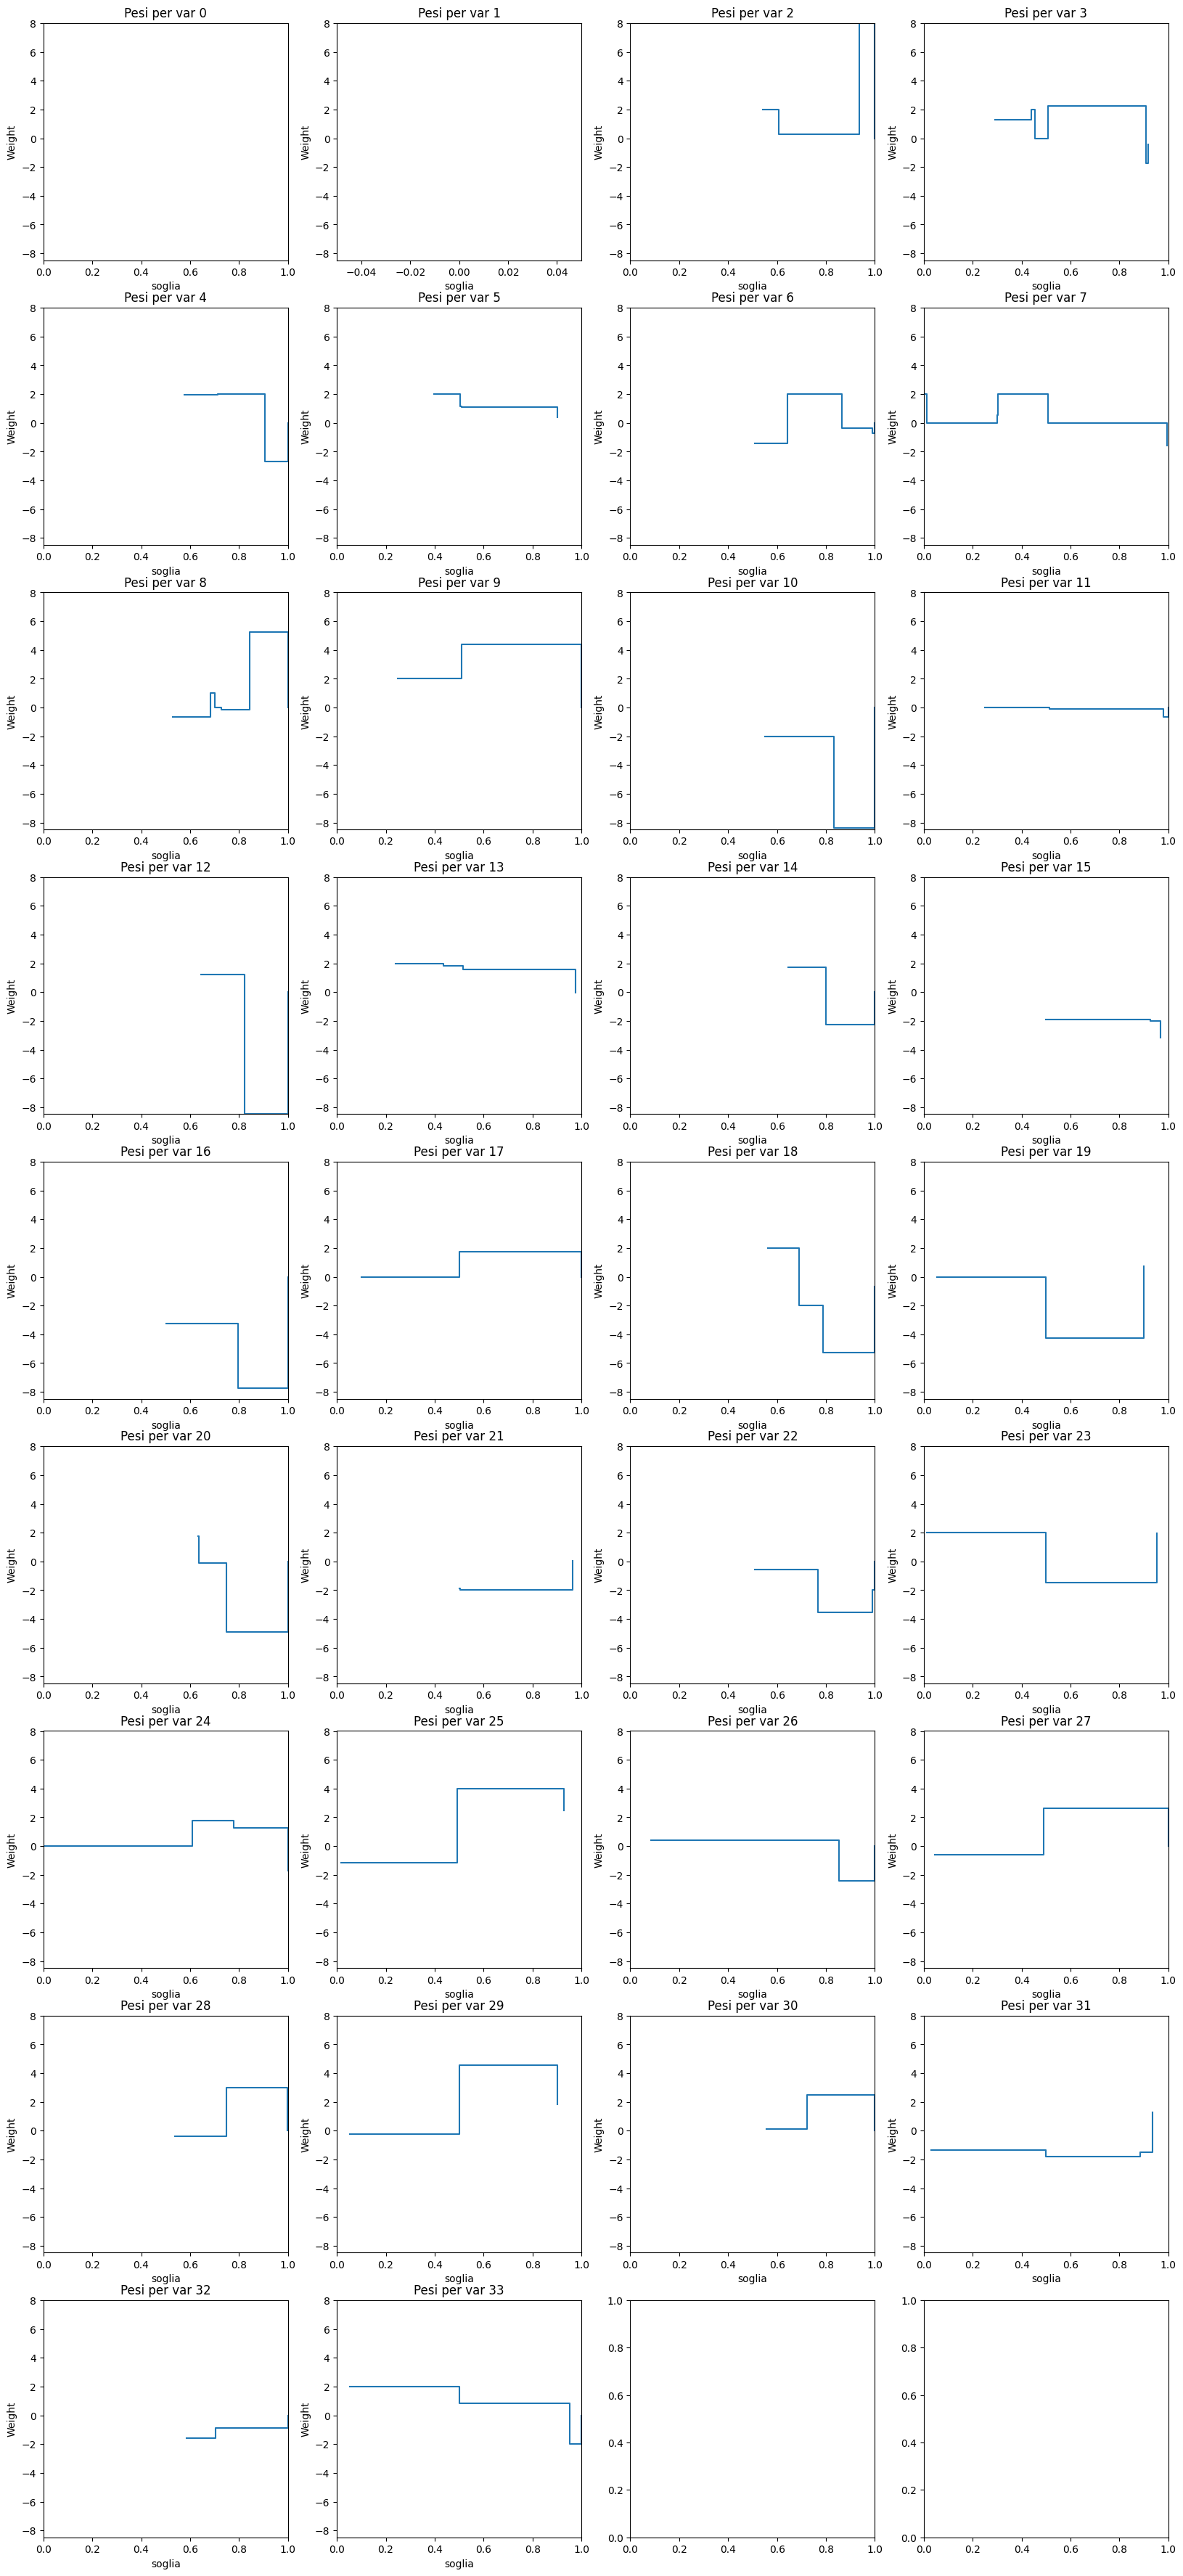

In [26]:
BinarizedSVM.visualizza_soglie(svm)

In [27]:
from sklearn.svm import SVC

In [24]:
svc = SVC(C=1, kernel='linear')
svc.fit(X, y)
accuracy_score(svc.predict(X), y)

0.9145299145299145

In [23]:
print(sum(y==-1), sum(y==1))
print(sum(y==1)/len(y))

126 225
0.6410256410256411
